## Fourier Transform

* A small implementation of Fourier Transforms from the video 3Blue1Bwown.

### Idea behind Fourier Transforms

The most basic support that Fourier transforms gives is to decompose frequencies from sound. Now, how this extends well beyond the sound and frequencies into various areas of math, or even physics.

* Extracting freqeuncies from sound
* Uncertainity principle
* Riemann Zeta functions and primes
* Differential equations.

Fourier transforms is more like un-mixing colors which are basically mixed up in the bucket. 

First of all, a simple cos wave is generated - let's say, 3 beats per second - 3Hz frequency. A portion of the graph is selected, for example between 0 to 4.5 seconds. The key idea is basically to take this graph and wrap it up around a circle. More, like a rotating vector, where each point in time, its length is equal to the height of the graph at that time. So, high points of the graph correspond to a greater distance from the origin, and low points end up closer to the origin. And right now, it is drawn in such a way that moving forward 2 seconds in time corresponds to a single rotation around the circle. 

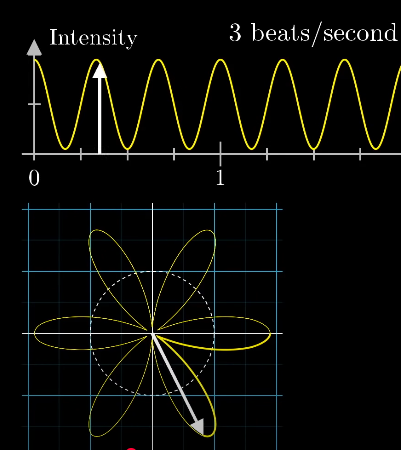

This vector rounds up or is rotating at half a cycle per second. So, there are two different frequencies at play here - one is frequency of signal, 3Hz and then separately wrapping up the circle, is 0.5 Hz. The second frequency can be adjusted - faster or slower. 

The choise of winding frequency determines what the wound up graph looks like. Visually, it can be little complex depending on the winding frequency. 

A vuage idea : what if the winding frequency matches up the frequency of our signal - 3Hz signal. 

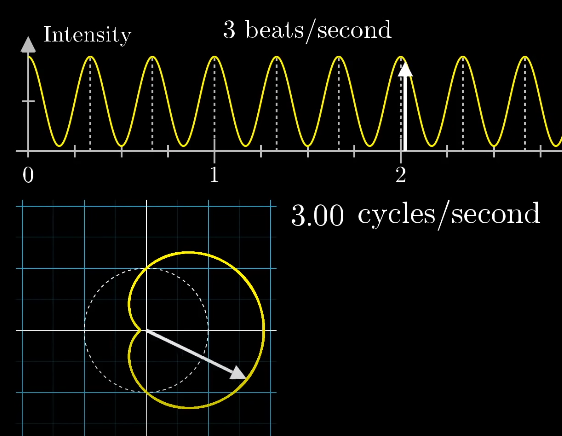

All the high points happens to be on the right side and all the lower points happens to be on the left side. But how do we take advantage of that in building frequency un-mixing machine?

Well, image this graph is having some kind of mass of it, like a metal wire. This little dot is basically the center of mass. 

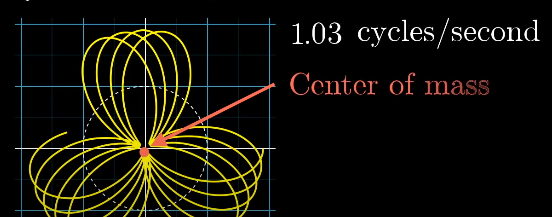

As we change the winding frequency, the center of mass kind of wobbles around a bit. And for most of the winding frequencies, the peaks and the valleys are all spaced out in such a way that the center of mass stays pretty close to the origin. 

But when the winding frequency is the same as the frequency of the signal - the center of mass is somewhat far to the right. 

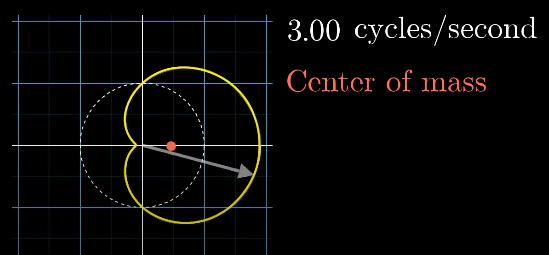

If we keep track of the center of mass, as to where that center of mass is and we only keep track of the x coordinate - for frequency of zero, the x coordinate is relatively high and as we increase the winding frequency and the graph balances out around the circle the x-coordinate that center of mass goes closer to zero, and it just wobbles around a bit. At 3 Hz frequency when everything lines up, there is a spike.

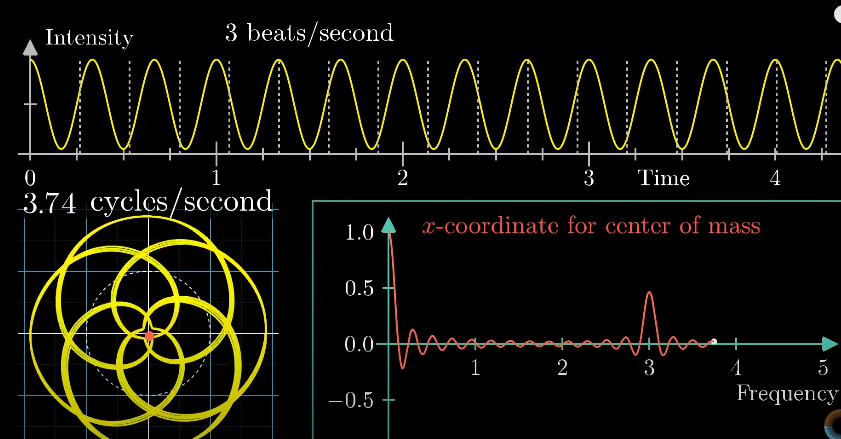

As summary till now, we have an original amplitude vs time graph, then we have a wound up version of the graph in two-dimensional plane and as third, we have a plot for how the winding frequency influences the center of mass of that graph. 

By the way, when the winding frequency is zero, there is a big spike. This big spike around zero in our frequency plotjust corresponds to the fact that the whole cosine wave is shifted up. If we chose a signal that oscillates around zero, dipping into negative values, it would only have a spike at 3 Hz frequency. But negative values are little weird for first example, so lets think it in a shifted up graph. That spike around zero only corresponds to the shift.

Our main focus, as far as the frequency decomposition is concerned, is that bump around 3. The third plot is basically - almost fourier transforms. There are couple of differences between this and actual fourier transforms. But it is visible here, how it picks out the frequency of the signal. 

This is interesting as how it enables us to take a singla consisting of multiple frequencies and pick out what they are. Thats basically what a frequency un-mixing machine looks like.  

## 1. Generating a signal

We will be using a cosine wave of 3 Hz frequency, as the input signal.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

Text(0, 0.5, 'Cos wave of 3 Hz frequency')

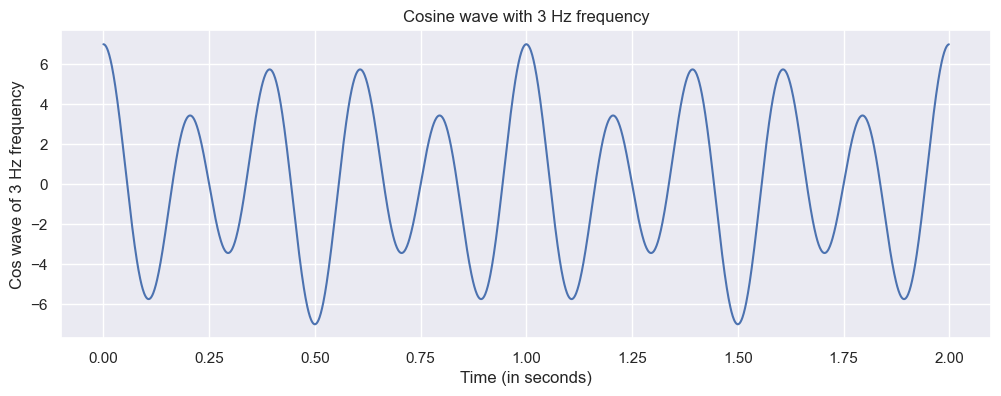

In [10]:
f = 3.0
f2 = 5.0
t = np.arange(0, 2, 0.001)

cos_wave = np.cos(2*np.pi*f*t)
cos_wave = 2*np.cos(2*np.pi*f*t) + 5*np.cos(2*np.pi*f2*t)

plt.figure(figsize=(12,4))
plt.plot(t, cos_wave)
plt.title("Cosine wave with 3 Hz frequency")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cos wave of 3 Hz frequency")

## 2. Warping the input signal wave around

Just to summary the idea, we will try wrapping the input signal for several sampling frequencies. Then by keeping track of the x-coordinate of the center of mass, considering the warped graph as a piece of metal wire, we estimate the frequencies present in the input signal. 

The range of frequency search is kept here as 0 and 10 Hz. 

In [11]:
r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0
sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for sf in sf_list:
    r_cord.append([(cos_wave[i], 2*np.pi*sf*t[i]) for i in range(len(t))])

In [12]:
x_cord, y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp * np.cos(theta) for (amp, theta) in r_cord[l]] )
    y_cord.append( [amp * np.sin(theta) for (amp, theta) in r_cord[l]] )

Below cell plots all the curves that pop up while doing this for each value of the sampling frequency in our list

Will take a little bot of time to execute, because the number of plots may be high and once every plot is made, only then the figure pops up

The Red dot denotes the center of mass of the graph

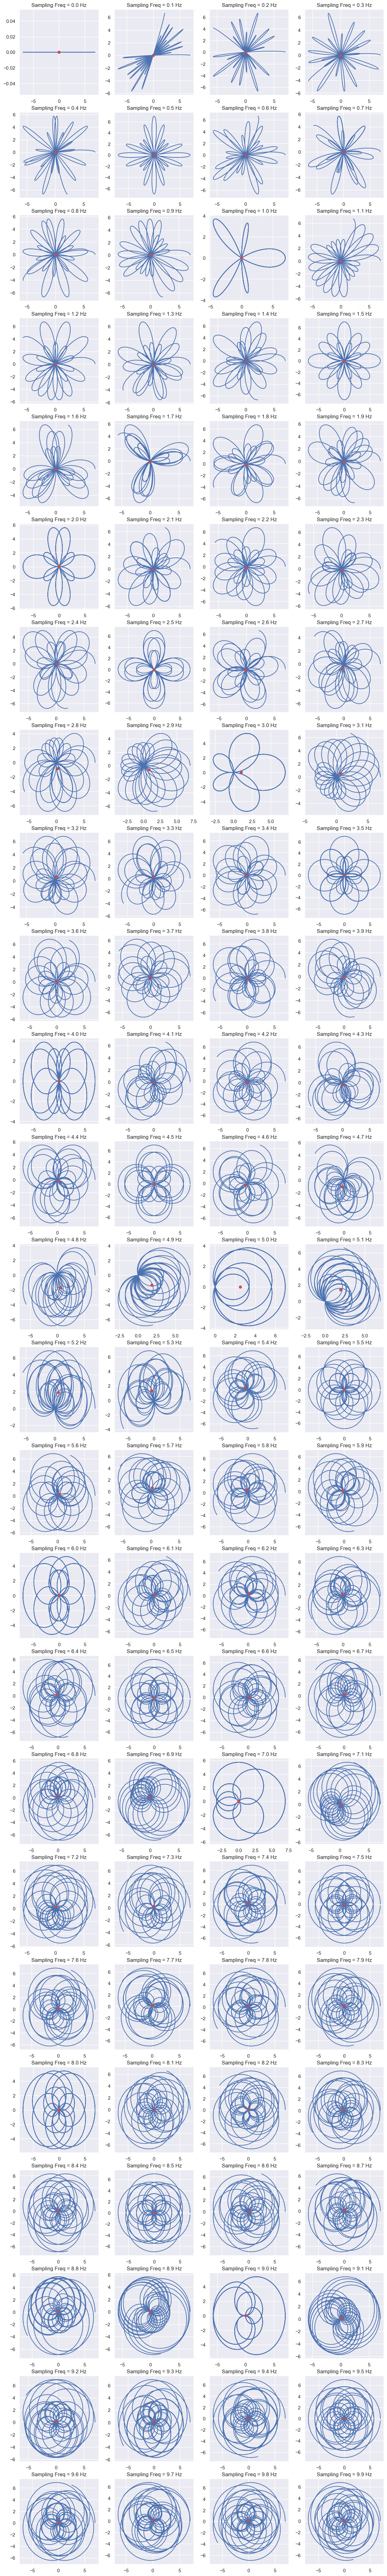

In [13]:
mean_list = []

plt.figure(figsize=(15, 110))
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l])
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or')
    plt.title("Sampling Freq = " + str(round(sf_list[l], 2)) + " Hz")

    # Staring the COM for plotting later
    x_mean = np.sum(x_cord[l])
    mean_list.append(x_mean)

# 3. Plotting Amplitude vs Sampling Frequency

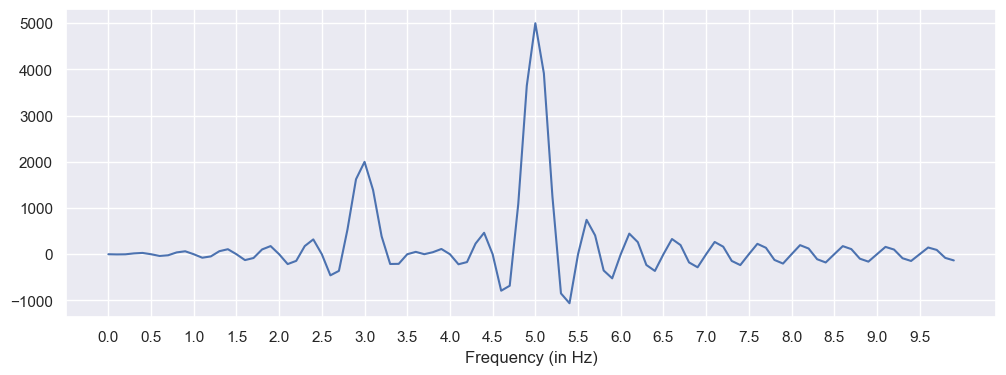

In [14]:
plt.figure(figsize=(12,4))
plt.xlabel("Frequency (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
sns.set()
plt.plot(sf_list, mean_list)

For clear estimation of frequencies present, we need to smoothen the graph
Below is the smoothed version of the graph, with a clear peak near around 3 Hz

([<matplotlib.axis.XTick at 0x25146053380>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5'),
  Text(7.0, 0, '7.0'),
  Text(7.5, 0, '7.5'),
  Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5')])

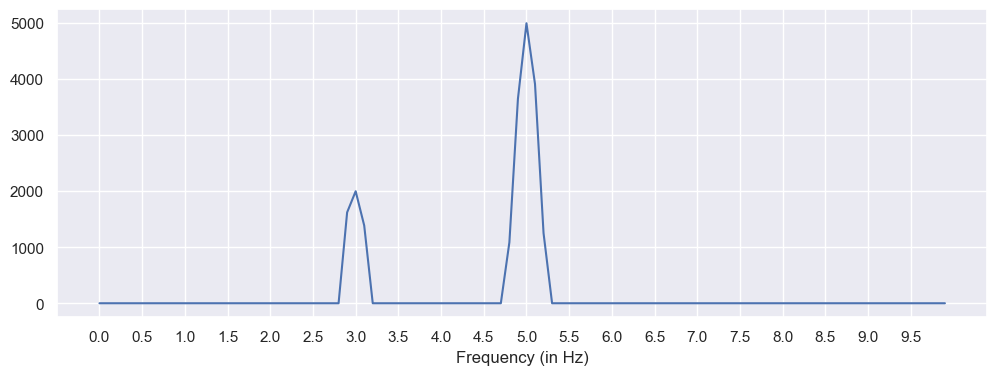

In [15]:
plt.figure(figsize=(12,4))
smoothed = [i if i > 0 and i > 0.2*max(mean_list) else 0 for i in mean_list]
plt.plot(sf_list, smoothed)
plt.xlabel("Frequency (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))

Plotting the same graph as a bar chart, as the frequencies are depicted in a typical Fourier Analysis

<BarContainer object of 100 artists>

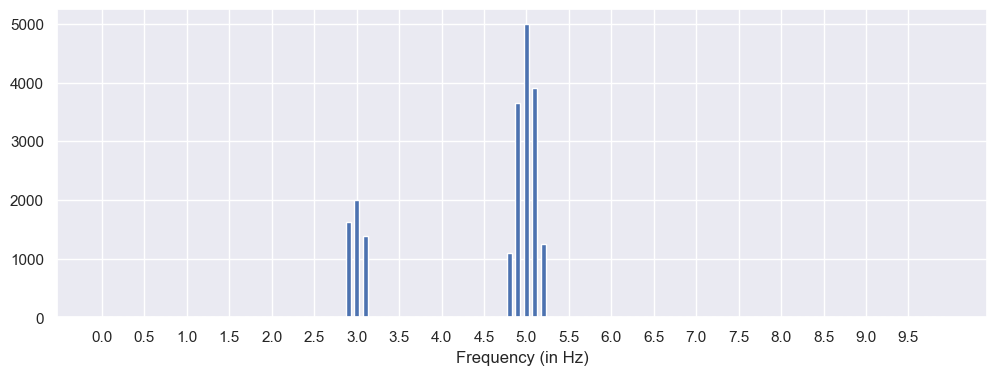

In [16]:
plt.figure(figsize=(12,4))
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.xlabel("Frequency (in Hz)")
plt.bar(sf_list, smoothed, width = 0.06)